In [360]:
#importing the dependencies
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

/var/folders/3l/qnm5hprx4z76qvd5ygknmsvr0000gn/T/ipykernel_2913/2031149325.py:6: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [361]:
# Load the dataset from the provided path
file_path = "house_price_prediction_dataset.csv"
origin_data = pd.read_csv(file_path)

In [362]:
# Displaying the unfiltered first 5 rows of data
origin_data.head()

Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056

In [363]:
# Describing the shape of the data by indicating the number of rows and columns (rows , columns)
origin_data.shape

(2000, 10)

In [364]:
# Fetching first 20 rows
origin_data.head(20)

Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0    1  1360         5          4       3       1970  Downtown  Excellent   
1    2  4272         5          4       3       1958  Downtown  Excellent   
2    3  3592         2          2       3       1938  Downtown       Good   
3    4   966         4          2       2       1902  Suburban       Fair   
4    5  4926         1          4       2       1975  Downtown       Fair   
5    6  3944         1          2       1       1906     Urban       Poor   
6    7  3671         1          1       2       1948     Rural       Poor   
7    8  3419         2          4       1       1925  Suburban       Good   
8    9   630         2          2       1       1932     Rural       Poor   
9   10  2185         3          3       1       2000  Downtown       Poor   
10  11  1269         1          4       2       1947  Suburban       Poor   
11  12  2891         4          4       3       1978     Urban  Excellent   
12  13  2933         4          3       2       1901  Downtown       Poor   
13  14  1684         1          1       1       2004     Rural       Good   
14  15  3885         1          3       1       1970     Urban       Fair   
15  16  4617         1          4       2       1931  Downtown       Poor   
16  17  3404         2          1       1       1903     Urban       Fair   
17  18   974         2          2       1       1919  Downtown       Poor   
18  19  1582         2          2       2       2013  Suburban       Good   
19  20  3058         5          2       2       2016  Downtown  Excellent   

   Garage   Price  
0      No  149919  
1      No  424998  
2      No  266746  
3     Yes  244020  
4     Yes  636056  
5      No   93262  
6     Yes  448722  
7     Yes  594893  
8     Yes  652878  
9      No  340375  
10    Yes  653685  
11    Yes  127123  
12     No  849947  
13     No  399355  
14    Yes  481838  
15     No  853032  
16    Yes  208964  
17    Yes  905742  
18     No  989305  
19     No  218767

In [365]:
# Checking for any duplicate values
origin_data.duplicated().sum()

0

In [366]:
# Finding the datatype
origin_data.dtypes

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

In [367]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [368]:
# Checking to see if we have any null values within the dataset
origin_data.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [369]:
origin_data.head()

Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056

In [370]:
# Creation of single level variables
# ----------------------

In [371]:
# finding the average price depending on the location (analysis),rounding to two decimal
location_price = origin_data.groupby("Location")["Price"].mean().round(2)
print(location_price)

Location
Downtown    536059.66
Rural       538613.94
Suburban    557416.33
Urban       518963.55
Name: Price, dtype: float64


In [372]:
 # findinf the average priceof the house by condition(excellent,good ,poor)
condition_price = origin_data.groupby("Condition")["Price"].mean().round(2)
print(condition_price)

Condition
Excellent    530812.01
Fair         560594.14
Good         529002.35
Poor         528933.22
Name: Price, dtype: float64


In [373]:
# analysing the price of house based on number of bedrooms
bedroom_price = origin_data.groupby("Bedrooms")["Price"].mean().round(1)
print(bedroom_price)

Bedrooms
1    530561.6
2    545546.5
3    546977.9
4    533696.9
5    532500.1
Name: Price, dtype: float64


In [374]:
#creation of variable to show the median price based on the year built
yearbuilt_median_price = origin_data.groupby('YearBuilt')['Price'].median()
print(yearbuilt_median_price)

YearBuilt
1900    493795.5
1901    610085.0
1902    559565.5
1903    298089.0
1904    716217.0
          ...   
2019    609099.5
2020    532055.0
2021    440890.5
2022    499862.5
2023    687835.5
Name: Price, Length: 124, dtype: float64


In [375]:
# create a new column for the age of the house:(addinf a new columns name age_of_house)
house_age = origin_data["Age_of_House"]= 2024-origin_data["YearBuilt"]
print(house_age)

0        54
1        66
2        86
3       122
4        49
       ... 
1995    101
1996      5
1997    121
1998     88
1999    121
Name: YearBuilt, Length: 2000, dtype: int64


In [376]:
# New Variable created testing the floor area average
floors_avg_area = origin_data.groupby('Floors')['Area'].mean()
print(floors_avg_area)

Floors
1    2748.756430
2    2804.050651
3    2805.388889
Name: Area, dtype: float64


In [377]:
# New variable to determine price by number of bathrooms present in house
bathrooms_min_price = origin_data.groupby('Bathrooms')['Price'].min()
print(bathrooms_min_price)

Bathrooms
1    51082
2    50005
3    53657
4    51845
Name: Price, dtype: int64


In [378]:
# Location conditions relative to the average price
location_condition_avg_price = origin_data.groupby(['Location', 'Condition'])['Price'].mean()
print(location_condition_avg_price)

Location  Condition
Downtown  Excellent    524477.967320
          Fair         584624.766423
          Good         510704.191176
          Poor         525203.022727
Rural     Excellent    547966.141667
          Fair         579754.727273
          Good         500956.690000
          Poor         515768.680328
Suburban  Excellent    553103.377049
          Fair         562783.795276
          Good         570986.252252
          Poor         543906.186992
Urban     Excellent    497976.370690
          Fair         511798.304000
          Good         534554.131579
          Poor         530908.484615
Name: Price, dtype: float64


In [379]:
# the price of a hosue relative to the factor garage
garage_max_price = origin_data.groupby('Garage')['Price'].max()
print(garage_max_price)

Garage
No     999656
Yes    999453
Name: Price, dtype: int64


In [380]:
# Location count based on ID
location_count = origin_data.groupby('Location')['Id'].count()
print(location_count)

Location
Downtown    558
Rural       474
Suburban    483
Urban       485
Name: Id, dtype: int64


In [381]:
# Total price by area
total_price_by_area = origin_data.groupby('Area')['Price'].sum()
print(total_price_by_area)

Area
501     1026822
502      184962
503      850118
504      169574
505      727823
         ...   
4994    1545300
4995     286028
4996    1153917
4997     286887
4999     139460
Name: Price, Length: 1622, dtype: int64


In [382]:
# Data grouped by area
total_houses_by_area = origin_data.groupby('Area')['Id'].count()
print(total_houses_by_area)

Area
501     2
502     1
503     1
504     1
505     1
       ..
4994    3
4995    1
4996    2
4997    1
4999    1
Name: Id, Length: 1622, dtype: int64


In [383]:
# multi-level variables
# -----------------------

In [384]:
# creation of variable showing the percentage of total houses in each location
total_houses = location_count.sum()
location_percentage = (location_count / total_houses) * 100
print("Percentage of houses in each location:")
print(location_percentage)

Percentage of houses in each location:
Location
Downtown    27.90
Rural       23.70
Suburban    24.15
Urban       24.25
Name: Id, dtype: float64


In [385]:
#calculating the price per house by area (relative to the number of houses in an area
price_per_house_by_area = total_price_by_area / total_houses_by_area
print(price_per_house_by_area)

Area
501     513411.0
502     184962.0
503     850118.0
504     169574.0
505     727823.0
          ...   
4994    515100.0
4995    286028.0
4996    576958.5
4997    286887.0
4999    139460.0
Length: 1622, dtype: float64


# Dele Akanle
---

# Question: 
### Are there patterns of appreciation or depreciation in house prices for homes built in different decades (e.g., pre-1950 vs. post-1950)?

In [388]:
# create a dataframe that refelcts pre 1950 vs post 1950
price = origin_data.set_index("Id")["Price"]
year_built = origin_data.set_index("Id")["YearBuilt"]

year_vs_price_df = pd.DataFrame()
year_vs_price_df["Year built"] = year_built
year_vs_price_df["Price"] = price

print(year_vs_price_df)

      Year built   Price
Id                      
1           1970  149919
2           1958  424998
3           1938  266746
4           1902  244020
5           1975  636056
...          ...     ...
1996        1923  295620
1997        2019  580929
1998        1903  476925
1999        1936  161119
2000        1903  482525

[2000 rows x 2 columns]


      Year built   Price
Id                      
25          1900  688668
577         1900  756168
1928        1900  193092
755         1900   92103
1945        1900  776262
...          ...     ...
1951        2023  153845
599         2023  594950
1708        2023  305560
612         2023   99966
1754        2023  747143

[2000 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

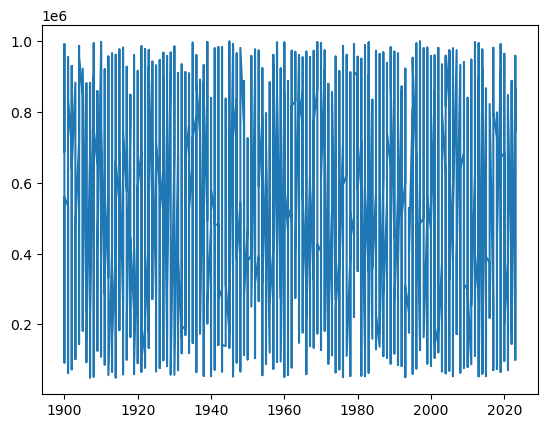

In [389]:
# analyze correlation between year built and price 
sorted_year_vs_price_df = year_vs_price_df.sort_values(by=["Year built"])
print(sorted_year_vs_price_df)
# define data vales
x = sorted_year_vs_price_df["Year built"]
y = sorted_year_vs_price_df["Price"]
plt.plot(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

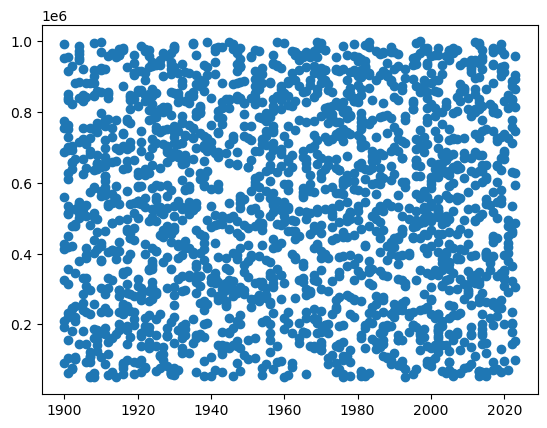

In [390]:
plt.scatter(x,y)
plt.show

In [391]:
print(pearsonr(x, y))

PearsonRResult(statistic=0.0048451638346972675, pvalue=0.8285605208962548)


In [392]:
# Establish the bins.
period_bins = [1899, 1950, 2023]
period_labels = ["Pre-1950", "Post-1950"]

In [393]:
sorted_year_vs_price_df["Period built"] = pd.cut(sorted_year_vs_price_df["Year built"] , bins = period_bins, labels = period_labels)
print(sorted_year_vs_price_df)

      Year built   Price Period built
Id                                   
25          1900  688668     Pre-1950
577         1900  756168     Pre-1950
1928        1900  193092     Pre-1950
755         1900   92103     Pre-1950
1945        1900  776262     Pre-1950
...          ...     ...          ...
1951        2023  153845    Post-1950
599         2023  594950    Post-1950
1708        2023  305560    Post-1950
612         2023   99966    Post-1950
1754        2023  747143    Post-1950

[2000 rows x 3 columns]


In [394]:
# For second iteration
# Current price: 756168
# Previous price: 688668
# Change in price = Current price - previous price

# Check if pre-1950 or post-1950
# Store current price
# Subtract current price from previous price
# Add difference to change list
# Update new previous price as current price

# for " an_individual_value" in "some_set_of_data":
#for row in sorted_year_vs_price_df["Price"]:

#Initialize variables
curr_price = 0
prev_price = 0
prev_period = ""
curr_period = ""
pre_1950_change = []
post_1950_change = []
change=[]

# For loop that loops through each row in the DataFrame
for index, row in sorted_year_vs_price_df.iterrows():
    period_built = row["Period built"]
    curr_price = row["Price"]

    diff_in_price = curr_price - prev_price
    curr_period = period_built #Track period to keep Pre and Post 1950 calculations seperate
    change.append(diff_in_price)
    
    # if(a_certain_conditon_is_met):
    if period_built == "Pre-1950":
        pre_1950_change.append(diff_in_price)
        post_1950_change.append(0)
    elif period_built == "Post-1950":
        if prev_period == "Pre-1950" and curr_period == "Post-1950":
            diff_in_price = curr_price - 0 # Make sure that we arent subtracting Pre-1950 from Post-1950 price
        post_1950_change.append(diff_in_price)
        pre_1950_change.append(0)
        
    prev_price = curr_price
    prev_period = curr_period
        
print("Length of Price Change List:", len(change))
print("Length of Pre-1950 Price Change List:", len(pre_1950_change))
print("Length of Post-1950 Price Change List:", len(post_1950_change))

Length of Price Change List: 2000
Length of Pre-1950 Price Change List: 2000
Length of Post-1950 Price Change List: 2000


In [395]:
# Add changes list to Dataframe
sorted_year_vs_price_df["Price Change"] = change
sorted_year_vs_price_df

Year built   Price Period built  Price Change
Id                                                 
25          1900  688668     Pre-1950        688668
577         1900  756168     Pre-1950         67500
1928        1900  193092     Pre-1950       -563076
755         1900   92103     Pre-1950       -100989
1945        1900  776262     Pre-1950        684159
...          ...     ...          ...           ...
1951        2023  153845    Post-1950       -332090
599         2023  594950    Post-1950        441105
1708        2023  305560    Post-1950       -289390
612         2023   99966    Post-1950       -205594
1754        2023  747143    Post-1950        647177

[2000 rows x 4 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

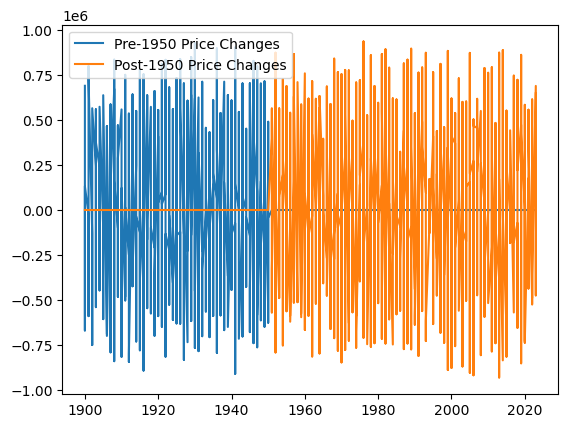

In [396]:
x = sorted_year_vs_price_df["Year built"]
y1 = pre_1950_change
y2 = post_1950_change

plt.plot(x, y1, label = "Pre-1950 Price Changes")
plt.plot(x, y2, label = "Post-1950 Price Changes")
plt.legend()
plt.show

In [397]:
print("Pre-1950 Correlation", pearsonr(x, pre_1950_change))
print("Post-1950 Correlation", pearsonr(x, post_1950_change))

Pre-1950 Correlation PearsonRResult(statistic=-0.0016155635016071408, pvalue=0.9424387072592203)
Post-1950 Correlation PearsonRResult(statistic=0.00041487661431369, pvalue=0.9852062746826162)
